In [1]:
import pandas as pd 


data = pd.read_csv('../dataset/dados_pregao_posi3.csv')
data = data.rename(columns={'data_pregao': 'ds', 'preco_ultimo_negocio': 'y'})
colunas = ['ds', 'y']
data = data[colunas]
data['ds'] = pd.to_datetime(data['ds'])

data

,ds,y
0,2018-10-17,2.30
1,2018-10-18,2.31
2,2018-10-19,2.45
3,2018-10-22,2.45
4,2018-10-23,2.54
...,...,...
1652,2018-10-09,2.29
1653,2018-10-10,2.22
1654,2018-10-11,2.24
1655,2018-10-15,2.29


In [2]:
from prophet import Prophet

model = Prophet()
model.fit(data)

e:\Workspace\pregao_forecasting\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
19:37:02 - cmdstanpy - INFO - Chain [1] start processing
19:37:02 - cmdstanpy - INFO - Chain [1] done processing


In [3]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

e:\Workspace\pregao_forecasting\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
e:\Workspace\pregao_forecasting\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
e:\Workspace\pregao_forecasting\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarra

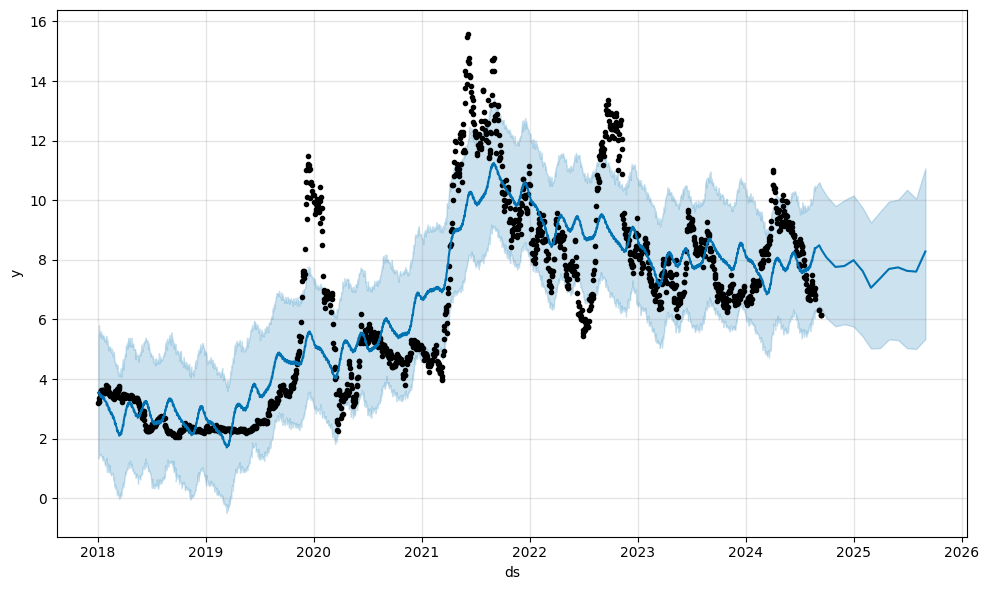

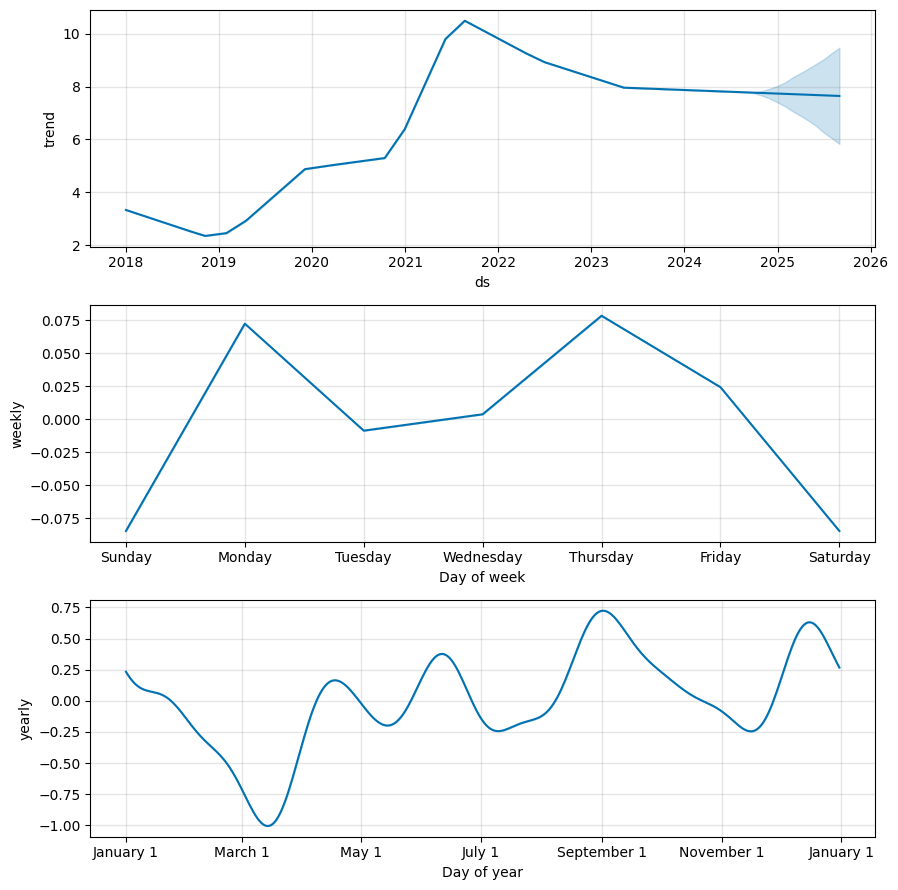

In [4]:
from prophet.plot import plot, plot_components
from matplotlib import pyplot as plt

plot(model, forecast)
plot_components(model, forecast)
plt.show()

In [5]:
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

df_metrics = performance_metrics(df_cv)

mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Square Error: {mse:.2f}')
print(f'Root Mean Square Error: {rmse:.2f}')

  0%|          | 0/8 [00:00<?, ?it/s]19:37:04 - cmdstanpy - INFO - Chain [1] start processing
19:37:04 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:00<00:01,  3.97it/s]19:37:04 - cmdstanpy - INFO - Chain [1] start processing
19:37:04 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:00<00:01,  3.11it/s]19:37:05 - cmdstanpy - INFO - Chain [1] start processing
19:37:05 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:00<00:01,  3.06it/s]19:37:05 - cmdstanpy - INFO - Chain [1] start processing
19:37:05 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:01<00:01,  2.74it/s]19:37:05 - cmdstanpy - INFO - Chain [1] start processing
19:37:06 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:01<00:01,  2.44it/s]19:37:06 - cmdstanpy - INFO - Chain [1] start processing
19:37:06 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:02<00:00,  2.08it/s]19:37:07 - cmds

Mean Absolute Error: 4.93
Mean Square Error: 45.21
Root Mean Square Error: 6.72
